In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# 1. Load Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:

# 2. Preprocessing
# Reshape to (Batch, Height, Width, Channels) for CNN
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# One-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [4]:

# 3. Define Advanced CNN Model
model = Sequential([
    # Block 1: Detect simple features (edges, curves)
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Block 2: Detect complex features (loops, intersections)
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Classification Block
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# 4. Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331,754 (1.27 MB)

 Trainable params: 330,858 (1.26 MB)

 Non-trainable params: 896 (3.50 KB)

In [7]:
# 5. Data Augmentation (The Key to >99.3% Accuracy)
# Generates slightly modified versions of images during training
datagen = ImageDataGenerator(
        rotation_range=10,      # Rotate image slightly
        zoom_range = 0.1,       # Zoom in/out slightly
        width_shift_range=0.1,  # Shift horizontally
        height_shift_range=0.1) # Shift vertically

datagen.fit(x_train)

In [9]:
# 6. Callbacks for Optimization
# Reduce LR: If accuracy stalls, slow down learning to find the "perfect" spot
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
# Early Stopping: Stop if model stops improving to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [14]:
# 7. Train
# Note: We use datagen.flow() instead of just x_train
history = model.fit(datagen.flow(x_train, y_train_cat, batch_size=64),
                    epochs=30, # More epochs needed for augmented data
                    validation_data=(x_test, y_test_cat),
                    callbacks=[reduce_lr, early_stop],
                    verbose=1)




Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 167s 178ms/step - accuracy: 0.9435 - loss: 0.1864 - val_accuracy: 0.9820 - val_loss: 0.0590 - learning_rate: 0.0010
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 166s 177ms/step - accuracy: 0.9684 - loss: 0.1030 - val_accuracy: 0.9926 - val_loss: 0.0239 - learning_rate: 0.0010
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 165s 176ms/step - accuracy: 0.9764 - loss: 0.0792 - val_accuracy: 0.9886 - val_loss: 0.0349 - learning_rate: 0.0010
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 169s 180ms/step - accuracy: 0.9785 - loss: 0.0682 - val_accuracy: 0.9933 - val_loss: 0.0188 - learning_rate: 0.0010
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 201s 179ms/step - accuracy: 0.9812 - loss: 0.0626 - val_accuracy: 0.9947 - val_loss: 0.0156 - learning_rate: 0.0010
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 163s 174ms/step - accuracy: 0.9822 - loss: 0.0558 - val_accuracy: 0.9925 - val_loss: 0.0200 - learning_rate: 0.0010
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy

In [15]:

# 8. Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\n🚀 Improved CNN Model Test Accuracy: {test_acc * 100:.2f} %")



🚀 Improved CNN Model Test Accuracy: 99.62 %


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step


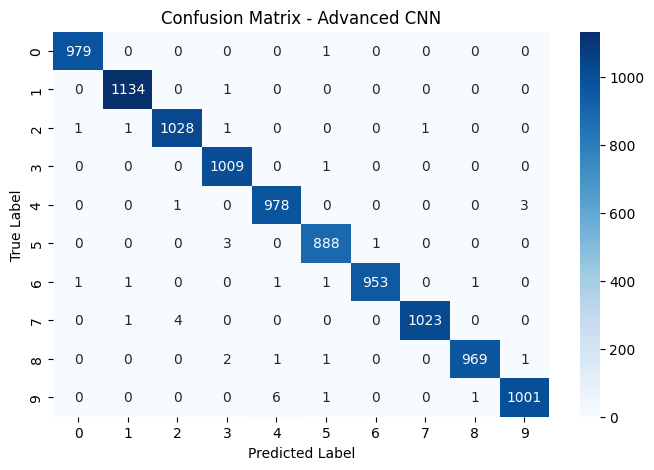

In [16]:

# 9. Confusion Matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - Advanced CNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


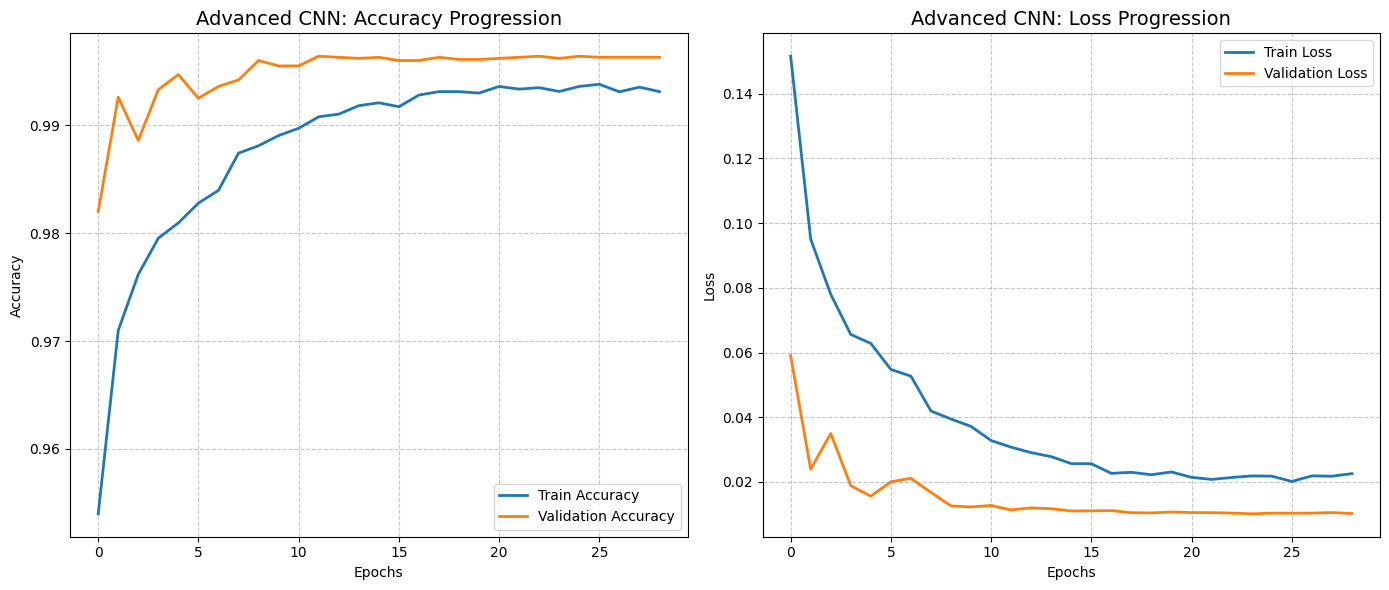

In [20]:
# --- Plotting Performance of Advanced CNN ---
plt.figure(figsize=(14, 6))

# 1. Accuracy Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title("Advanced CNN: Accuracy Progression", fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)  # Grid helps visualize the plateau

# 2. Loss Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title("Advanced CNN: Loss Progression", fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step


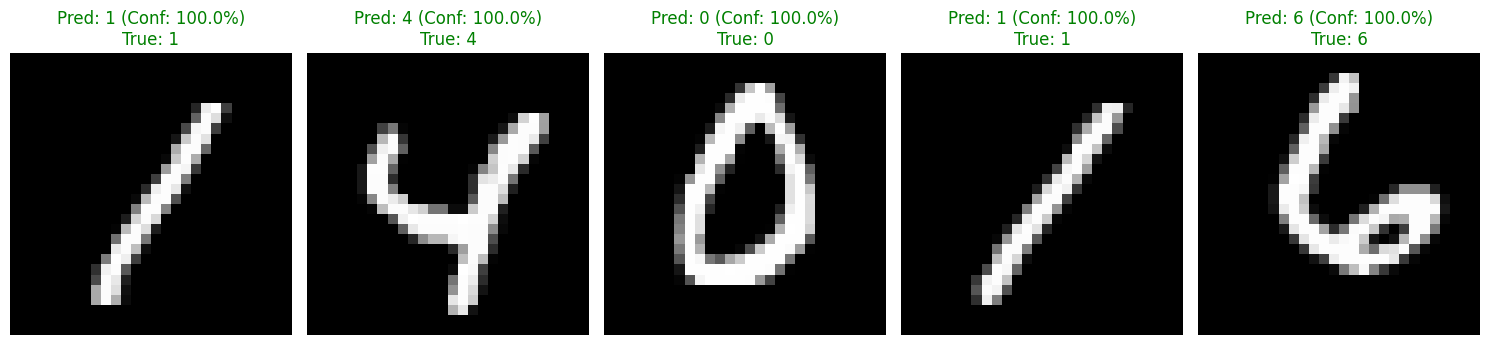

In [21]:
# 1. Generate Predictions
# We calculate probabilities first to show confidence scores
y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob, axis=1)

# 2. Sample Predictions
num_samples = 5
# Ensure unique samples with replace=False
indices = np.random.choice(len(x_test), num_samples, replace=False)

plt.figure(figsize=(15, 4)) # Wider figure to fit the details

for i, idx in enumerate(indices):
    # Reshape: The CNN input is (28, 28, 1), but imshow needs (28, 28)
    img = x_test[idx].reshape(28, 28)

    # Extract prediction details
    pred_label = y_pred[idx]
    true_label = y_test[idx]
    confidence = y_prob[idx][pred_label] * 100 # Confidence percentage

    # Logic: Text is Green if correct, Red if wrong
    color = 'green' if pred_label == true_label else 'red'

    plt.subplot(1, num_samples, i+1)
    plt.imshow(img, cmap='gray')

    # Title showing Prediction, True Label, and Confidence
    plt.title(f"Pred: {pred_label} (Conf: {confidence:.1f}%)\nTrue: {true_label}", color=color, fontsize=12)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [22]:

# 10. Save Model
model.save("mnist_cnn_advanced.keras")
print("✅ Model saved as 'mnist_cnn_advanced.keras'")

✅ Model saved as 'mnist_cnn_advanced.keras'
